In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Implementing a SOM

In [ ]:
class Som:
    def __init__(self, nrows, ncols, input_len, lr0 = 0.1, radius0 = 4.0): #nrighedellasom, numcolonnesom, lunghezza dei vettori che riceviamo in input(numero di pesi che appartengono ad ogni neurone della som)
                                                                          #(il vettore di input deve avere la stessa lunghezza del vettore dei pesi di ogni neurone)
        """
            Initialize your class
        """
        self.nrows = nrows
        self.ncols = ncols
        self.input_len = input_len
        self.lr0 = lr0
        self.radius0 = radius0
        self.weights = np.random.rand(nrows, ncols, input_len) #inizializzo tutti i pesi dei neuroni della som casualmente (usando uan distribuzione uniforme che ci genera dei valori tra 0 e 1 quindi abbiamo valori piccoli per i pesi)
        #praticamente la matrice dei pesi ha la stessa forma della matrice che rappresenta la som solo che ogni elemento di questa matrice
        #è un vettore che contiene input_len elementi.







    def bmu(self, ex):
        """
            Given an example returns the coordinates of the unit in the map with the largest activation
        """

        distanza_euclidea = self.unit_distances(ex)

        return np.array(np.unravel_index(np.argmin(distanza_euclidea), distanza_euclidea.shape))






    def unit_distances(self, ex):
        """
            Returns a nrow x ncols matrix containing in cell (i,j) the euclidean distances between ex (example) and the weight of the unit in position (i,j).
        """
        '''
        matrice_restituita = np.zeros(self.nrows, self.ncols, self.input_len)
        for i in range(0, nrows):
          for j in range(0, ncols):
            distanza_euclidea = np.linalg.norm(ex - weights[i,j])

        return distanza_euclidea
        '''
        distanza_euclidea = np.linalg.norm(self.weights - ex, axis=len(self.weights.shape)-1, ord=2) #farà il primo peso - ex, il secondo - ex e così via.
        #gli assi sono le dimensioni che ho utilizzato per creare la matrice (o tensore). axis=2 significa che se io
        #questa matrice M = [[2,3], [4,5]] questa matrice ha due assi e quindi io posso decidere se lavorare per righe o per colonne
        #asse = 0 vuol dire che voglio lavorare per righe, se metto 1 vuol dire che voglio eseguire le operazioni tra gli elementi lungo le colonne.



        return distanza_euclidea







    def lr(self, t):
        """
            Returns the learning rate for training step number 't'
        """
        #t = numero di iterata a cui siamo arrivati

        return self.lr0 * np.exp(-t/self.T) #T = numero totatle di iterazioni che vogliamo, lo inizializzeremo
        #quando faremo il fit dei dati





    def neighborhood_radius(self, t):
        """
            Returns the neighborhood radius at time 't'. It corresponds to sigma(n) in the theory.
        """
        return self.radius0 * np.exp(-t/self.T)





    def topological_neighborhood(self, unit1, unit2, t):
        """
            Returns the neighborhood weight for the given two units (evaluated at time t). It corresponds to function h_{j,i} in the theory.
        """
        dis12 = np.linalg.norm(unit1 - unit2)
        return np.exp(- dis12**2 / (2*(self.neighborhood_radius(t)**2)) )




    def train_step(self, ex, t):
        bmu = self.bmu(ex)

        for i in range(self.nrows):
          for j in range (self.ncols):
            lr = self.lr(t)
            hij = self.topological_neighborhood([i,j], bmu, t)
            self.weights[i,j] = self.weights[i,j] + self.lr(t) * hij * (ex - self.weights[i][j])




    def fit(self, data, T):
        """
            Performs 'T' training steps (you might want to store T inside a variable in the object so that it can be used to evaluate the formulae
            for the neighbor radius and for h)
        """

        self.T = T
        for t in range(T): #t viene incrementato qui
          ex = data[np.random.randint(0, len(data) - 1)]
          self.train_step(ex, t)








#s = Som(3,3,5)
#s.bmu(np.array([0.01, 0.04, ]))



# Experiments on the `Digits` dataset

Load the dataset

In [ ]:
digits = datasets.load_digits()

`digits.data` now contains the examples in the dataset while `digits.target` contains the classess associated to the examples.

SOMs usually perform best when the data is normalized. Normalize the data (choose the technique you prefer) and put the results in X and y variables.

In [ ]:
X = digits.data
y = digits.target

Instantiate the som with an n x n matrix setting an appropriate learning rate and radius. Experiment with different n, lr and radiuses to find something that gives you good results.

In [ ]:
som = Som(30,30,64,lr0=0.1, radius0=8)

Train the SOM. You may want to perform at least 1000 iterations, but feel free to experiemnt with other values.

In [ ]:
som.fit(X, 1000)

Use the following script to plot your results, if everything is ok, you should see the digits to be nicely organized into neat clusters in the map.

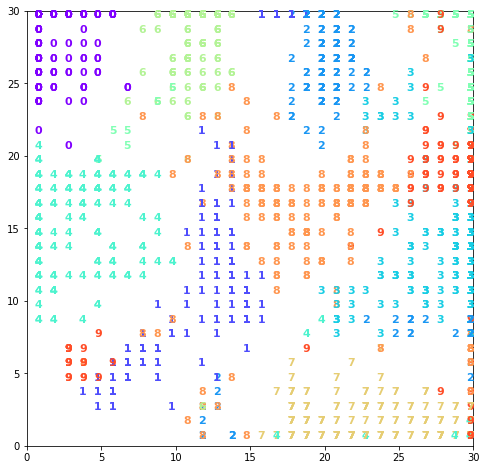

In [ ]:
plt.figure(figsize=(8,8))

for x, t in zip(X,y):
    bmu = som.bmu(x)
    plt. text(bmu[0]+.5,  bmu[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})

plt.axis([0, som.weights.shape[0], 0,  som.weights.shape[1]])
plt.show()
